%ls

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Data Extraction

In [9]:
df = pd.read_csv("datasetTugas.csv")

In [10]:
df.head()

,Verbal,Kuantitatif,Inggris,IPK
0,6.5,7.4,7.6,2.7
1,5.7,6.6,5.9,2.8
2,8.0,9.1,6.2,3.3
3,9.5,9.2,8.5,3.6
4,7.6,5.8,6.4,2.5


## EDA

In [13]:
df.shape

(10, 4)

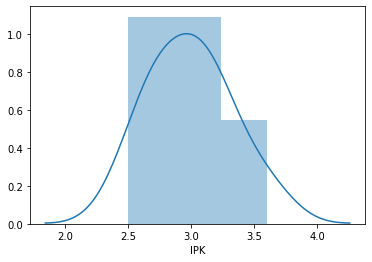

In [15]:
# check distribution of the IPK
sns.distplot(df['IPK'])

In [16]:
df.info

<bound method DataFrame.info of    Verbal  Kuantitatif  Inggris  IPK
0     6.5          7.4      7.6  2.7
1     5.7          6.6      5.9  2.8
2     8.0          9.1      6.2  3.3
3     9.5          9.2      8.5  3.6
4     7.6          5.8      6.4  2.5
5     7.9          9.0      6.8  3.0
6     8.8          6.1      7.9  3.1
7     9.2          7.0      8.8  3.2
8     9.1          6.9      8.5  3.0
9     7.2          6.2      7.7  2.7>

In [17]:
df.describe()

,Verbal,Kuantitatif,Inggris,IPK
count,10.000000,10.000000,10.000000,10.000000
mean,7.950000,7.330000,7.430000,2.990000
std,1.241191,1.307287,1.043552,0.328126
min,5.700000,5.800000,5.900000,2.500000
25%,7.300000,6.300000,6.500000,2.725000
50%,7.950000,6.950000,7.650000,3.000000
75%,9.025000,8.600000,8.350000,3.175000
max,9.500000,9.200000,8.800000,3.600000


In [18]:
#see corelation
numerics_feats=df.dtypes[df.dtypes != 'object'].index

In [19]:
numerics_feats

Index(['Verbal', 'Kuantitatif', 'Inggris', 'IPK'], dtype='object')

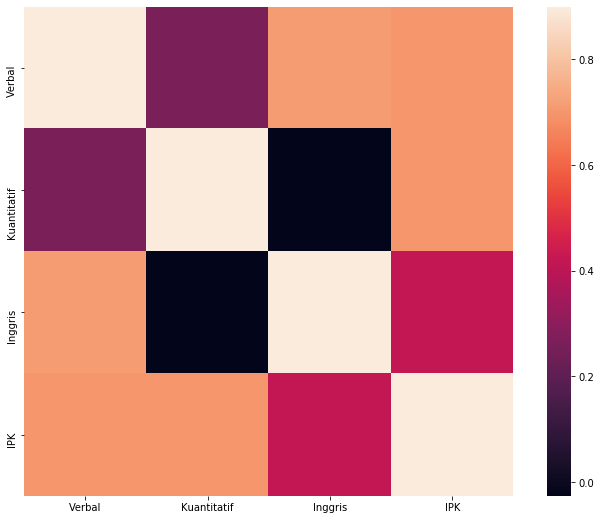

In [20]:
cormat = df[numerics_feats].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cormat, vmax=0.9, square=True)

## Feature Engineering

In [21]:
#Handling categorial variabels
df=pd.get_dummies(df, drop_first=True)

In [22]:
df.shape

(10, 4)

In [23]:
df.head()

,Verbal,Kuantitatif,Inggris,IPK
0,6.5,7.4,7.6,2.7
1,5.7,6.6,5.9,2.8
2,8.0,9.1,6.2,3.3
3,9.5,9.2,8.5,3.6
4,7.6,5.8,6.4,2.5


In [24]:
#Handling missing values
df = df.fillna(df.mean())

## Target Engineering

## Modelling

In [27]:
# for id -> df = df.set_index('Id')

X=df.drop("IPK", axis=1)
y=df['IPK']

In [28]:
X.head()

,Verbal,Kuantitatif,Inggris
0,6.5,7.4,7.6
1,5.7,6.6,5.9
2,8.0,9.1,6.2
3,9.5,9.2,8.5
4,7.6,5.8,6.4


In [29]:
y.head()

0    2.7
1    2.8
2    3.3
3    3.6
4    2.5
Name: IPK, dtype: float64

In [30]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_score

In [33]:
def rmse_cv(model):
    return np.sqrt(-cross_val_score(model, X,y, scoring = "neg_mean_squared_error", cv =5))

In [34]:
#Model Linear Regression
model_lr=LinearRegression()
rmse_cv(model_lr).mean()

0.27849487150108054

In [36]:
#Model Ridge Regression
model_ridge=RidgeCV(alphas=[1,0.1,0.01,0.0005])
rmse_cv(model_ridge).mean()

0.26037621730760907

In [37]:
#Model Ridge Regression
model_lasso=LassoCV(alphas=[1,0.1,0.01,0.0005])
rmse_cv(model_lasso).mean()

0.318703994982944

## Check Feature Importance

In [40]:
coef = pd.Series(model_lasso.fit(X,y).coef_, index=X.columns)

In [44]:
imp_coef = pd.concat([coef.sort_values().head(2),coef.sort_values().tail(2)])

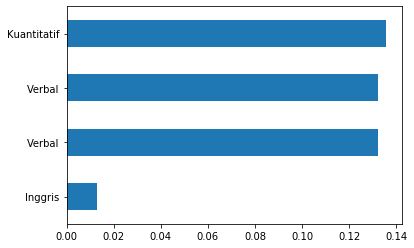

In [45]:
imp_coef.plot(kind="barh")

## Export model to Pickle File

In [46]:
import pickle
model_lasso.fit(X,y)
pickle.dump(model_lasso, open('model_lasso_ipk.pkl', 'wb'))